# Searching Algorithms

Searching Algorithms are designed to check for an element or retrieve an element from any data structure where it is stored. Based on the type of search operation, these algorithms are generally classified into two categories:

1. <b>Sequential Search:</b> In this, the list or array is traversed sequentially and every element is checked. For example: Linear Search.
2. <b>Interval Search:</b> These algorithms are specifically designed for searching in sorted data-structures. These type of searching algorithms are much more efficient than Linear Search as they repeatedly target the center of the search structure and divide the search space in half. For Example: Binary Search.

Linear Search to find the element “20” in a given list of numbers
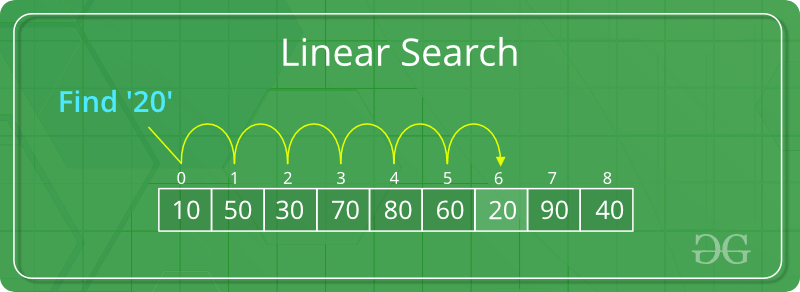
Binary Search to find the element “23” in a given list of numbers
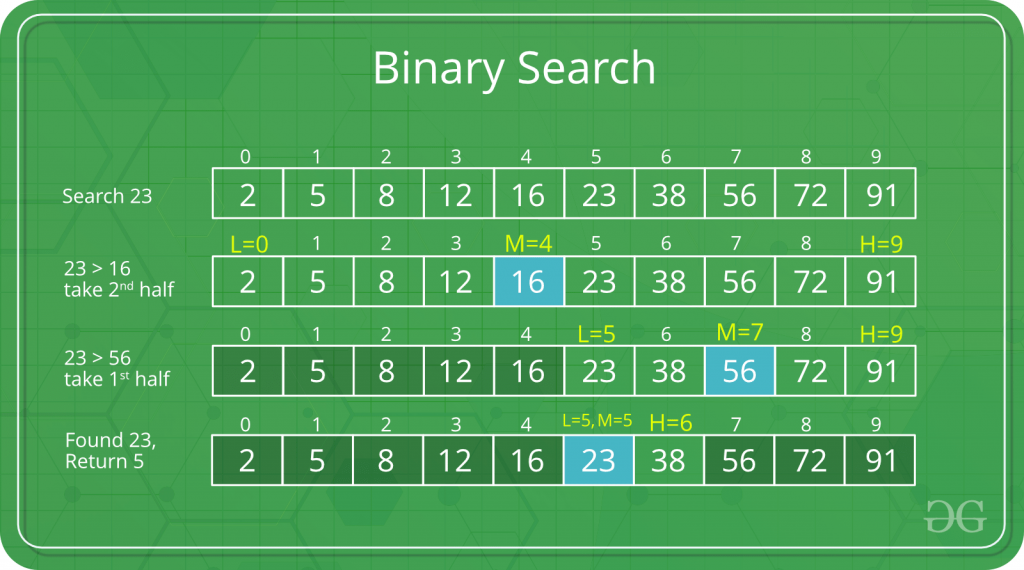

## Linear Search

Problem: Given an array arr[] of n elements, write a function to search a given element x in arr[].

Input : arr[] = {10, 20, 80, 30, 60, 50, 
                     110, 100, 130, 170}<br>
          x = 110;<br>
Output : 6<br>
Element x is present at index 6<br>

Input : arr[] = {10, 20, 80, 30, 60, 50, 
                     110, 100, 130, 170}<br>
           x = 175;<br>
Output : -1<br>
Element x is not present in arr[].

A simple approach is to do a linear search, i.e  

1. Start from the leftmost element of arr[] and one by one compare x with each element of arr[]
2. If x matches with an element, return the index.
3. If x doesn’t match with any of elements, return -1.

The time complexity of the above algorithm is O(n). 

Linear search is rarely used practically because other search algorithms such as the binary search algorithm and hash tables allow significantly faster-searching comparison to Linear search.

In [1]:
def search(arr,n,x):
    for i in range(0,n):
        if arr[i] == x:
            return i
    return -1

In [2]:
arr = [2, 3, 4, 10, 40]
x = 10
n = len(arr)
 
# Function call
result = search(arr, n, x)
if(result == -1):
    print("Element is not present in array")
else:
    print("Element is present at index", result)

Element is present at index 3


## Improve Linear Search Worst-Case Complexity

1. if element Found at last  O(n) to O(1)
2. It is the same as previous method because here we are performing 2 ‘if’ operations in one iteration of the loop and in previous method we performed only 1 ‘if’ operation. This makes both the time complexities same.

In [3]:
def search(arr, search_Element):
    left = 0
    length = len(arr)
    position = -1
    right = length - 1
    
    for left in range(0, right, 1):
        # If search_element is found with
        # left variable
        if arr[left] == search_Element:
            position = left
            print("Element found in Array at ", position +
                  1, " Position with ", left + 1, " Attempt")
            break
        # If search_element is found with
        # right variable
        if arr[right] == search_Element:
            position = right
            print("Element found in Array at ", position + 1,
                  " Position with ", length - right, " Attempt")
            break
        left+=1
        right-=1
    
    if position == -1:
        print("Not found in Array with ", left, " Attempt")

In [4]:
arr = [1, 2, 3, 4, 5]
search_element = 5
 
# Function call
search(arr, search_element)

Element found in Array at  5  Position with  1  Attempt


## Binary Search

Given a <b>sorted array</b> arr[] of n elements, write a function to search a given element x in arr[].

The idea of binary search is to use the information that the array is sorted and reduce the time complexity to O(Log n). <br>
We basically ignore half of the elements just after one comparison.<br>
1. Compare x with the middle element.
2. If x matches with the middle element, we return the mid index.
3. Else If x is greater than the mid element, then x can only lie in the right half subarray after the mid element. So we recur for the right half.
4. Else (x is smaller) recur for the left half.

<b>Time Complexity:</b><br>
T(n) = T(n/2) + c <br>
solution : theta(logn)

<b>Auxiliary Space:</b> O(1) in case of iterative implementation. In the case of recursive implementation, O(Logn) recursion call stack space.

### Recursive approach

In [1]:
def binarySearch(arr, l, r, x):
    #check base case
    if r >= l:
        mid = l + (r-l)//2
        # If element is present at the middle itself
        if arr[mid] == x:
            return mid
        # If element is smaller than mid, then it
        # can only be present in left subarray
        elif arr[mid] > x:
            return binarySearch(arr, l, mid-1, x)
        # Else the element can only be present
        # in right subarray
        else:
            return binarySearch(arr, mid+1, r, x)
    else:
        return -1

In [2]:
arr = [2, 3, 4, 10, 40]
x = 10
 
# Function call
result = binarySearch(arr, 0, len(arr)-1, x)
 
if result != -1:
    print("Element is present at index % d" % result)
else:
    print("Element is not present in array")

Element is present at index  3


### Iterative approach

In [3]:
def binarySearch(arr, l, r, x):
    while l<=r:
        mid = l + (r-l)//2
        if arr[mid] == x:
            return mid
        elif arr[mid] < x:
            l = mid + 1
        else:
            r = mid - 1
    return -1

In [4]:
arr = [ 2, 3, 4, 10, 40 ]
x = 10
 
# Function call
result = binarySearch(arr, 0, len(arr)-1, x)
 
if result != -1:
    print ("Element is present at index % d" % result)
else:
    print ("Element is not present in array")

Element is present at index  3


## Bitwise binary search

<b>Idea:</b><br>
Every number can be represented as a sum of the powers of the number 2.

Exemples:

76 = 64 + 8 + 4<br>
10 = 8  + 2<br>
7 = 4 + 2 + 1<br>

<b>Approach:</b>
Compute the first power of 2 that is greater or equal then the size of the array.Initialize an index as 0.
Loop while the computed power is greater than 0 and each time divide it by 2.
Each time the element at position [index + power] <= target we add to the index variable the respective power value. (Build the sum)
After the for loops check if the element at position [index] == target. If so the target element is present in the array, else not.

In [10]:
def binary_search(arr, size, target):
    index = 0
    power = 1
    # Compute the first power of 2 that is >= size
    while power < size:
        power = power<<1
    # loop while(power > 0)
    # and divide power by two each iteration
    while power > 0:
        # if the next condition is true
        # it means that the power value can contribute to the "sum"(a closer index where target might be)
        if ((index+power < size) and (arr[index + power] <= target)):
            index += power
        power = power>>1
    #  if the element at position [index] == target,
    #  the target value is present in the array
    if arr[index] == target:
        return index
    # else the value is not present in the array
    return -1

In [12]:
arr = [1, 3, 5, 7, 8]
x = 7
answer = binary_search(arr, len(arr), x)
print(answer)
# if answer == -1:
#     print("Element not found")
# else:
#     print("Element found at position", answer)

3


## Jump Search

Like Binary Search, Jump Search is a searching algorithm for sorted arrays. The basic idea is to check fewer elements (than linear search) by jumping ahead by fixed steps or skipping some elements in place of searching all elements.<br>
For example, suppose we have an array arr[] of size n and block (to be jumped) size m. Then we search at the indexes arr[0], arr[m], arr[2m]…..arr[km] and so on. Once we find the interval (arr[km] < x < arr[(k+1)m]), we perform a linear search operation from the index km to find the element x.<br>
Let’s consider the following array: (0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610). Length of the array is 16. Jump search will find the value of 55 with the following steps assuming that the block size to be jumped is 4.<br> 
STEP 1: Jump from index 0 to index 4;<br> 
STEP 2: Jump from index 4 to index 8;<br> 
STEP 3: Jump from index 8 to index 12;<br> 
STEP 4: Since the element at index 12 is greater than 55 we will jump back a step to come to index 8.<br> 
STEP 5: Perform linear search from index 8 to get the element 55.

<b>What is the optimal block size to be skipped?</b><br>
In the worst case, we have to do n/m jumps and if the last checked value is greater than the element to be searched for, we perform m-1 comparisons more for linear search. Therefore the total number of comparisons in the worst case will be ((n/m) + m-1). The value of the function ((n/m) + m-1) will be minimum when m = √n. Therefore, the best step size is m = √n.

Time Complexity : O(√n)<br> 
Auxiliary Space : O(1)

<b>Important points:</b>
1. Works only sorted arrays.
2. The optimal size of a block to be jumped is (√ n). This makes the time complexity of Jump Search O(√ n).
3. The time complexity of Jump Search is between Linear Search ( ( O(n) ) and Binary Search ( O (Log n) ).
4. Binary Search is better than Jump Search, but Jump search has an advantage that we traverse back only once (Binary Search may require up to O(Log n) jumps, consider a situation where the element to be searched is the smallest element or just bigger than the smallest). So in a system where binary search is costly, we use Jump Search.

In [13]:
import math

def jumpSearch(arr, x, n):
    # Finding block size to be jumped
    step = math.sqrt(n)
    # Finding the block where element is
    # present (if it is present)
    prev = 0
    while arr[int(min(step, n) - 1)] < x:
        prev = step
        step += math.sqrt(n)
        if prev >= n:
            return -1
    
    # Doing a linear search for x in
    # block beginning with prev.
    while arr[int(prev)] < x:
        prev += 1
        # If we reached next block or end
        # of array, element is not present
        if prev == min(step,n):
            return -1 
    # If element is found
    if arr[int(prev)] == x:
        return prev
    
    return -1

In [14]:
arr = [ 0, 1, 1, 2, 3, 5, 8, 13, 21,
    34, 55, 89, 144, 233, 377, 610 ]
x = 55
n = len(arr)
 
# Find the index of 'x' using Jump Search
index = jumpSearch(arr, x, n)
 
# Print the index where 'x' is located
print("Number" , x, "is at index" ,"%.0f"%index)

Number 55 is at index 10


## Interpolation Search
https://www.geeksforgeeks.org/interpolation-search/

Given a sorted array of n uniformly distributed values arr[], write a function to search for a particular element x in the array. 

Linear Search finds the element in O(n) time, Jump Search takes O(√ n) time and Binary Search take O(Log n) time. The Interpolation Search is an improvement over Binary Search for instances, where the values in a sorted array are uniformly distributed. Binary Search always goes to the middle element to check. On the other hand, interpolation search may go to different locations according to the value of the key being searched. For example, if the value of the key is closer to the last element, interpolation search is likely to start search toward the end side.

<b>To find the position to be searched, it uses following formula.</b><br>
// The idea of formula is to return higher value of pos<br>
// when element to be searched is closer to arr[hi]. And<br>
// smaller value when closer to arr[lo]<br>
pos = lo + [ (x-arr[lo])*(hi-lo) / (arr[hi]-arr[Lo]) ]<br>

arr[] ==> Array where elements need to be searched<br>
x     ==> Element to be searched<br>
lo    ==> Starting index in arr[]<br>
hi    ==> Ending index in arr[]<br>

<b>The formula for pos can be derived as follows.</b><br>
Let's assume that the elements of the array are linearly distributed.<br> 

General equation of line : y = m*x + c.<br>
y is the value in the array and x is its index.<br>

Now putting value of lo,hi and x in the equation<br>
arr[hi] = m*hi+c ----(1)<br>
arr[lo] = m*lo+c ----(2)<br>
x = m*pos + c     ----(3)<br>

m = (arr[hi] - arr[lo] )/ (hi - lo)<br>

subtracting eqxn (2) from (3)<br>
x - arr[lo] = m * (pos - lo)<br>
lo + (x - arr[lo])/m = pos<br>
pos = lo + (x - arr[lo]) *(hi - lo)/(arr[hi] - arr[lo])<br>

<b>Algorithm:</b><br> 
Rest of the Interpolation algorithm is the same except the above partition logic.<br>
Step1: In a loop, calculate the value of “pos” using the probe position formula.<br> 
Step2: If it is a match, return the index of the item, and exit.<br> 
Step3: If the item is less than arr[pos], calculate the probe position of the left sub-array. Otherwise calculate the same in the right sub-array.<br> 
Step4: Repeat until a match is found or the sub-array reduces to zero.
Below is the implementation of algorithm.

In [15]:
def interpolationSearch(arr, lo, hi, x):
    
    # Since array is sorted, an element present
    # in array must be in range defined by corner
    if lo <= hi and x >= arr[lo] and x <= arr[hi]:   
        # Probing the position with keeping
        # uniform distribution in mind.
        pos = lo + ((hi - lo)//(arr[hi] - arr[lo])*(x - arr[lo]))

        # Condition of target found
        if arr[pos] == x:
            return pos
        # If x is larger, x is in right subarray
        if arr[pos] < x:
            return interpolationSearch(arr, pos+1, hi, x)

        # If x is smaller, x is in left subarray
        if arr[pos] > x:
            return interpolationSearch(arr, lo, pos-1, x)

    return -1

In [16]:
arr = [10, 12, 13, 16, 18, 19, 20,
       21, 22, 23, 24, 33, 35, 42, 47]
n = len(arr)
 
# Element to be searched
x = 18
index = interpolationSearch(arr, 0, n - 1, x)
 
if index != -1:
    print("Element found at index", index)
else:
    print("Element not found")

Element found at index 4


## Exponential Search

Given a sorted array, and an element x to be searched, find position of x in the array.<br>
The name of this searching algorithm may be misleading as it works in O(Log n) time. The name comes from the way it searches an element.

Exponential search involves two steps:<br>
1. Find range where element is present
2. Do Binary Search in above found range.

<b>How to find the range where element may be present?</b><br> 
The idea is to start with subarray size 1, compare its last element with x, then try size 2, then 4 and so on until last element of a subarray is not greater. 
Once we find an index i (after repeated doubling of i), we know that the element must be present between i/2 and i (Why i/2? because we could not find a greater value in previous iteration)

Time Complexity :<br> O(Log n)<br> 
Auxiliary Space :<br> 
The below implementation of Binary Search is recursive and requires O(Log n) space. With iterative Binary Search, we need only O(1) space.

<b>Applications of Exponential Search:</b><br>
1. Exponential Binary Search is particularly useful for unbounded searches, where size of array is infinite. Please refer Unbounded Binary Search for an example.
2. It works better than Binary Search for bounded arrays, and also when the element to be searched is closer to the first element.

In [20]:
def binarySearch(arr, l, r, x):
    if r>= l:
        mid = l + (r-l)//2      
        if arr[mid] == x:
            return mid
        if arr[mid] > x:
            return binarySearch(arr, l , mid-1, x)
        return bianrySearch(arr, mid+1, r, x)
    return -1

def exponentialSearch(arr, n, x):
    # IF x is present at first
    # location itself
    if arr[0] == x:
        return 0
    # Find range for binary search
    # j by repeated doubling
    i = 1
    while i < n and arr[i] <= x:
        i = i*2
    # Call binary search for the found range
    return binarySearch(arr, i//2, min(i, n-1), x)

In [21]:
arr = [2, 3, 4, 10, 40]
n = len(arr)
x = 10
result = exponentialSearch(arr, n, x)
if result == -1:
    print("Element not found in the array")
else:
    print("Element is present at index %d" %(result))

Element is present at index 3


## Ternary Search

From the first look, it seems the ternary search does less number of comparisons as it makes Log3n recursive calls, but binary search makes Log2n recursive calls. Let us take a closer look. 

The following is recursive formula for counting comparisons in worst case of Binary Search. 
T(n) = T(n/2) + 2,  T(1) = 1
 
The following is recursive formula for counting comparisons in worst case of Ternary Search.
T(n) = T(n/3) + 4, T(1) = 1

In binary search, there are 2Log2n + 1 comparisons in worst case. In ternary search, there are 4Log3n + 1 comparisons in worst case. 

Time Complexity for Binary search = 2clog2n + O(1)
Time Complexity for Ternary search = 4clog3n + O(1)

Therefore, the comparison of Ternary and Binary Searches boils down the comparison of expressions 2Log3n and Log2n . The value of 2Log3n can be written as (2 / Log23) * Log2n . Since the value of (2 / Log23) is more than one, Ternary Search does more comparisons than Binary Search in worst case.

In [22]:
def ternarySearch(arr, l, r, x):
    if r>=l:
        mid1 = l + (r - l)//3
        mid2 = mid1 + (r - l)//3
        
        # If x is present at the mid1
        if arr[mid1] == x:
            return mid1
        
        # If x is present at the mid2
        if arr[mid2] == x:
            return mid2
        
        # If x is present in left one-third
        if arr[mid1] > x:
            return ternarySearch(arr, l, mid1-1, x)
        
        # If x is present in right one-third
        if arr[mid2] < x:
            return ternarySearch(arr, mid2+1, r, x)
        
        # If x is present in middle one-third
        return ternarySearch(arr, mid1+1, mid2-1, x)
    
    return -1

In [23]:
arr = [2, 3, 4, 10, 40]
n = len(arr)
x = 10
result = ternarySearch(arr, 0, n-1, x)
if result == -1:
    print("Element not found in the array")
else:
    print("Element is present at index %d" %(result))

Element is present at index 3
